In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import random

In [207]:
df = pd.read_csv("Dataset 1_EV charging reports.csv", sep=';')
df.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


### ========================= Data Preparation =========================

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_ID         6878 non-null   int64  
 1   Garage_ID          6878 non-null   object 
 2   User_ID            6878 non-null   object 
 3   User_type          6878 non-null   object 
 4   Shared_ID          1412 non-null   object 
 5   Start_plugin       6878 non-null   object 
 6   Start_plugin_hour  6878 non-null   int64  
 7   End_plugout        6844 non-null   object 
 8   End_plugout_hour   6844 non-null   float64
 9   El_kWh             6878 non-null   object 
 10  Duration_hours     6844 non-null   object 
 11  month_plugin       6878 non-null   object 
 12  weekdays_plugin    6878 non-null   object 
 13  Plugin_category    6878 non-null   object 
 14  Duration_category  6844 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 806.1+ KB


In [209]:
#Null Values
print(f"df shape: {df.shape}")
df.isnull().sum()

df shape: (6878, 15)


session_ID              0
Garage_ID               0
User_ID                 0
User_type               0
Shared_ID            5466
Start_plugin            0
Start_plugin_hour       0
End_plugout            34
End_plugout_hour       34
El_kWh                  0
Duration_hours         34
month_plugin            0
weekdays_plugin         0
Plugin_category         0
Duration_category      34
dtype: int64

In [210]:
#A big quantity of null values --> drop
df.drop(['Shared_ID'], axis=1, inplace=True)
df.isnull().sum()

session_ID            0
Garage_ID             0
User_ID               0
User_type             0
Start_plugin          0
Start_plugin_hour     0
End_plugout          34
End_plugout_hour     34
El_kWh                0
Duration_hours       34
month_plugin          0
weekdays_plugin       0
Plugin_category       0
Duration_category    34
dtype: int64

In [211]:
#End_plugout, End_plugout_hour and Duration_hours have the same Null Values, so lets just drop them. It's 34 records only.
df[df["Duration_hours"].isna()]

,session_ID,Garage_ID,User_ID,User_type,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
5051,5052,MS22,MS22-1,Private,16.12.2019 15:18,15,NaN,NaN,"22,73",NaN,Dec,Monday,late afternoon (15-18),NaN
5075,5076,Bl2,Bl2-3,Private,16.12.2019 21:36,21,NaN,NaN,"2,9",NaN,Dec,Monday,late evening (21-midnight),NaN
5082,5083,Bl2,Bl2-2,Private,17.12.2019 14:19,14,NaN,NaN,"13,44",NaN,Dec,Tuesday,early afternoon (12-15),NaN
5091,5092,Bl2,Bl2-5,Private,17.12.2019 16:50,16,NaN,NaN,"2,6",NaN,Dec,Tuesday,late afternoon (15-18),NaN
5094,5095,Bl2,Bl2-8,Private,17.12.2019 17:45,17,NaN,NaN,"1,96",NaN,Dec,Tuesday,late afternoon (15-18),NaN
5095,5096,Bl2,Bl2-1,Private,17.12.2019 17:50,17,NaN,NaN,"0,72",NaN,Dec,Tuesday,late afternoon (15-18),NaN
5143,5144,UT9,Share-12,Shared,18.12.2019 19:30,19,NaN,NaN,"17,76",NaN,Dec,Wednesday,early evening (18-21),NaN
5166,5167,AdA6,AdA6-1,Private,19.12.2019 15:50,15,NaN,NaN,"5,62",NaN,Dec,Thursday,late afternoon (15-18),NaN
5169,5170,UT7,UT7-1,Private,19.12.2019 16:08,16,NaN,NaN,"4,91",NaN,Dec,Thursday,late afternoon (15-18),NaN
5172,5173,SR2,SR2-3,Private,19.12.2019 16:23,16,NaN,NaN,"24,36",NaN,Dec,Thursday,late afternoon (15-18),NaN


In [212]:
df = df.dropna()
df.isnull().sum()

session_ID           0
Garage_ID            0
User_ID              0
User_type            0
Start_plugin         0
Start_plugin_hour    0
End_plugout          0
End_plugout_hour     0
El_kWh               0
Duration_hours       0
month_plugin         0
weekdays_plugin      0
Plugin_category      0
Duration_category    0
dtype: int64

In [213]:
#the following columns will not be useful to us: session_ID, Duration_category, Plugin_category, weekdays_plugin, 
#                                                month_plugin, User_type

no_useful = ["session_ID", "Duration_category", "Plugin_category", "weekdays_plugin", "month_plugin", "User_type"]
df.drop(no_useful, axis=1, inplace=True)
display(df.head())
df.info()

,Garage_ID,User_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours
0,AdO3,AdO3-4,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05"
1,AdO3,AdO3-4,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667"
2,AdO3,AdO3-4,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889"
3,AdO3,AdO3-2,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222"
4,AdO3,AdO3-2,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556"


<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 0 to 6877
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Garage_ID          6844 non-null   object 
 1   User_ID            6844 non-null   object 
 2   Start_plugin       6844 non-null   object 
 3   Start_plugin_hour  6844 non-null   int64  
 4   End_plugout        6844 non-null   object 
 5   End_plugout_hour   6844 non-null   float64
 6   El_kWh             6844 non-null   object 
 7   Duration_hours     6844 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 481.2+ KB


In [214]:
#El_kWh: object --> float
#Duration_hours: objetc --> float
#Start_plugin and End_plugout: object --> datetime

df["El_kWh"] = df['El_kWh'].str.replace(',', '.').astype(float)
df["Duration_hours"] = df['Duration_hours'].str.replace(',', '.').astype(float)
df["Start_plugin"] = pd.to_datetime(df["Start_plugin"], format='%d.%m.%Y %H:%M')
df["End_plugout"] = pd.to_datetime(df["End_plugout"], format='%d.%m.%Y %H:%M')

display(df.head())
df.info()

,Garage_ID,User_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours
0,AdO3,AdO3-4,2018-12-21 10:20:00,10,2018-12-21 10:23:00,10.0,0.30,0.050000
1,AdO3,AdO3-4,2018-12-21 10:24:00,10,2018-12-21 10:32:00,10.0,0.87,0.136667
2,AdO3,AdO3-4,2018-12-21 11:33:00,11,2018-12-21 19:46:00,19.0,29.87,8.216389
3,AdO3,AdO3-2,2018-12-22 16:15:00,16,2018-12-23 16:40:00,16.0,15.56,24.419722
4,AdO3,AdO3-2,2018-12-24 22:03:00,22,2018-12-24 23:02:00,23.0,3.62,0.970556


<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 0 to 6877
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Garage_ID          6844 non-null   object        
 1   User_ID            6844 non-null   object        
 2   Start_plugin       6844 non-null   datetime64[ns]
 3   Start_plugin_hour  6844 non-null   int64         
 4   End_plugout        6844 non-null   datetime64[ns]
 5   End_plugout_hour   6844 non-null   float64       
 6   El_kWh             6844 non-null   float64       
 7   Duration_hours     6844 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 481.2+ KB


In [215]:
#Creating a new column that is also going to be predicted
#The dataset is from Norway, so we search about the cost of 1khw there and we r using the found values (in R$) to create the new feature
#The source link is below  

random_number = round(random.uniform(1, 1.4),2) 
#The cost of 1kwh in Norway is about R$1,00 to R$1,40

df['Cost(R$)'] = [kwh*random_number for kwh in df['El_kWh']]

In [216]:
df.head()

,Garage_ID,User_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,Cost(R$)
0,AdO3,AdO3-4,2018-12-21 10:20:00,10,2018-12-21 10:23:00,10.0,0.30,0.050000,0.360
1,AdO3,AdO3-4,2018-12-21 10:24:00,10,2018-12-21 10:32:00,10.0,0.87,0.136667,1.044
2,AdO3,AdO3-4,2018-12-21 11:33:00,11,2018-12-21 19:46:00,19.0,29.87,8.216389,35.844
3,AdO3,AdO3-2,2018-12-22 16:15:00,16,2018-12-23 16:40:00,16.0,15.56,24.419722,18.672
4,AdO3,AdO3-2,2018-12-24 22:03:00,22,2018-12-24 23:02:00,23.0,3.62,0.970556,4.344


https://pt.countryeconomy.com/energia-e-meio-ambiente/eletricidade-preco-domestica/noruega

In [217]:
set(df['Garage_ID'])

{'AdA1',
 'AdA6',
 'AdO1',
 'AdO3',
 'AsO10',
 'AsO2',
 'AsO4',
 'AsO6',
 'AsO8',
 'Bl2',
 'Bl7',
 'MS1',
 'MS11',
 'MS22',
 'NR1',
 'Ris',
 'SR14',
 'SR2',
 'SR4',
 'UT1',
 'UT15',
 'UT2',
 'UT7',
 'UT9'}

#### We will use the initial of "Start_plugin" data to create our time series dataset and the sum of energy consumption and cost

In [218]:
#Creating a dataframe for each garage and filtering a column of the total energy consumption and total cost by data
time_series_df = {}

for id in df['Garage_ID'].unique():
    time_series_df[id] = df[df['Garage_ID'] == id].copy()
    time_series_df[id] = df.groupby(df['Start_plugin'].dt.date)['El_kWh'].sum()

In [219]:
time_series_df['SR14'] #searching by Garage_ID and viewing the dataframe

Start_plugin
2018-12-21     31.04
2018-12-22     15.56
2018-12-24     19.76
2018-12-25     10.33
2018-12-26     36.49
               ...  
2020-01-27    498.51
2020-01-28    434.17
2020-01-29    848.84
2020-01-30    470.05
2020-01-31    178.06
Name: El_kWh, Length: 400, dtype: float64

### ======================= TimeSeries - AUTOARIMA =======================

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4919.626, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4799.070, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4634.356, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4917.631, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=4634.702, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=4620.958, Time=0.53 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=4633.855, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=4637.713, Time=0.78 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=4622.307, Time=1.16 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=4632.601, Time=0.50 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=4631.745, Time=0.43 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4898.893, Time=0.25 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=4

D:\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,pred
Start_plugin,
2019-11-13,NaN
2019-11-14,NaN
2019-11-15,NaN
2019-11-16,NaN
2019-11-17,NaN
...,...
2020-01-27,NaN
2020-01-28,NaN
2020-01-29,NaN


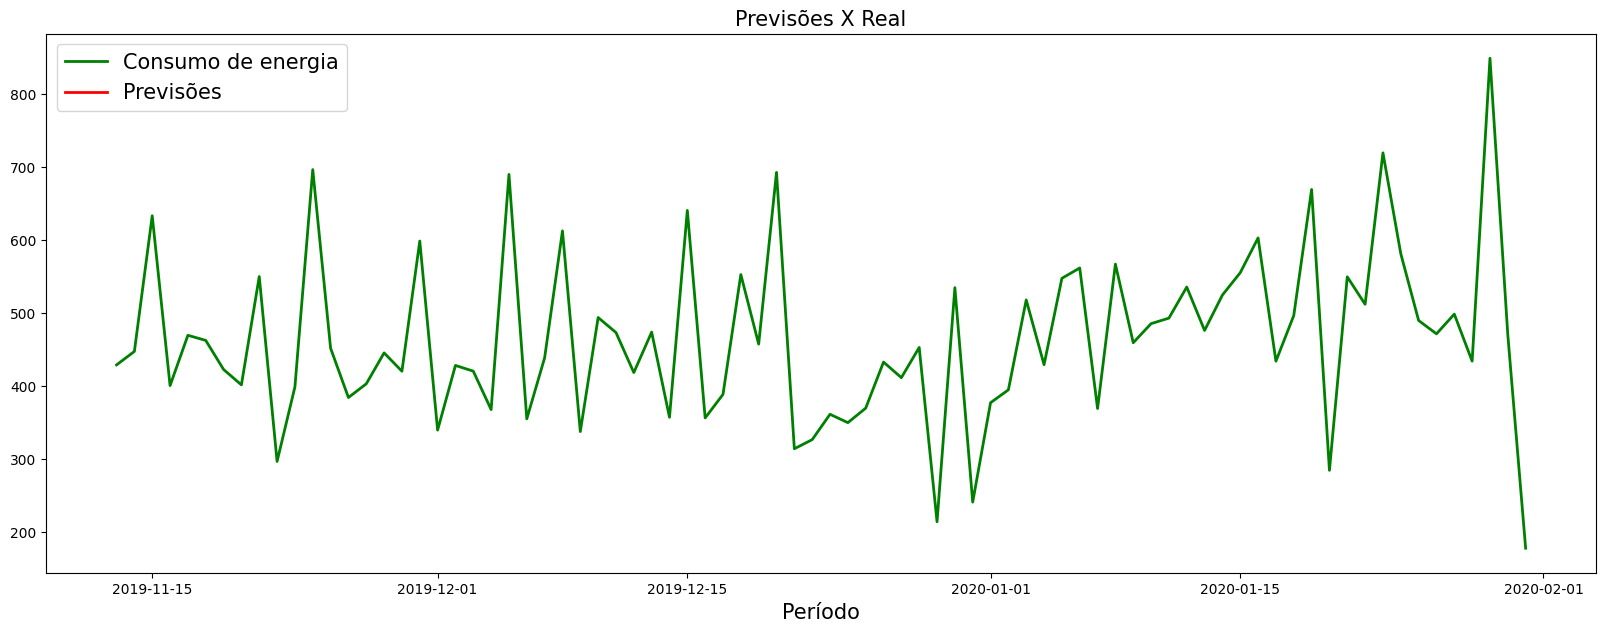

In [240]:
#Executa o AutoArima
ts_autoarima=auto_arima(time_series_df['SR14'],
                    # start_p=0,
                    # start_q=0,
                    # d=0,
                    # max_p=6,
                    # max_q=6,
                    # max_d=2,
                    # start_P=1,
                    # start_Q=1,
                    # D=1,
                    # max_P=2, max_D=1, max_Q=2, max_order=5,
                    seasonal=True, #ok
                    m=7, #daily data #ok 
                    trace=True, #ok
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True) #ok

train_size = int(len(time_series_df['SR14']) * 0.8) # 80% for training, 20% for testing
train, test = time_series_df['SR14'][:train_size], time_series_df['SR14'][train_size:]

ts_autoarima.fit(train)

pred=ts_autoarima.predict(n_periods=100)
pred=pd.DataFrame(pred,index=test.index, columns=['pred'])

display(pred)

pd.concat([test,pred],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Consumo de energia','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();